In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/danieltpham/vba-vietnamese-basketball-association/master/vba2019_player_data_final.csv')

In [3]:
data.head()

,Unnamed: 0,ROUND,TEAM,OPP,#,NAME,MIN,FGM,FGA,3PM,...,FTM,FTA,OREB,DREB,AST,STL,BLK,TO,PF,PTS
0,0,Regular 1,Danang-Dragons,Hanoi-Buffalos,44,"January, Anthony",40,14,31,3,...,2,3,3,17,0,1,0,3,2,33
1,1,Regular 1,Danang-Dragons,Hanoi-Buffalos,0,"Nguyen, Horace",36,3,17,2,...,1,1,0,1,6,3,0,1,2,9
2,2,Regular 1,Danang-Dragons,Hanoi-Buffalos,68,"Huy Dai, Dam",30,5,9,5,...,0,0,0,1,0,0,0,1,3,15
3,3,Regular 1,Danang-Dragons,Hanoi-Buffalos,99,"Nguyen Van, Hung",28,2,6,0,...,0,0,4,5,2,0,0,1,3,4
4,4,Regular 1,Danang-Dragons,Hanoi-Buffalos,7,"Ly, Austin",21,0,2,0,...,3,4,1,1,2,0,0,3,3,3


In [4]:
data

,Unnamed: 0,ROUND,TEAM,OPP,#,NAME,MIN,FGM,FGA,3PM,...,FTM,FTA,OREB,DREB,AST,STL,BLK,TO,PF,PTS
0,0,Regular 1,Danang-Dragons,Hanoi-Buffalos,44,"January, Anthony",40,14,31,3,...,2,3,3,17,0,1,0,3,2,33
1,1,Regular 1,Danang-Dragons,Hanoi-Buffalos,0,"Nguyen, Horace",36,3,17,2,...,1,1,0,1,6,3,0,1,2,9
2,2,Regular 1,Danang-Dragons,Hanoi-Buffalos,68,"Huy Dai, Dam",30,5,9,5,...,0,0,0,1,0,0,0,1,3,15
3,3,Regular 1,Danang-Dragons,Hanoi-Buffalos,99,"Nguyen Van, Hung",28,2,6,0,...,0,0,4,5,2,0,0,1,3,4
4,4,Regular 1,Danang-Dragons,Hanoi-Buffalos,7,"Ly, Austin",21,0,2,0,...,3,4,1,1,2,0,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,4,Finals 5,Saigon-Heat,Can-Tho-Catfish,12,"Nguyen-Huynh, Vinh",21,4,7,0,...,1,2,2,4,1,0,2,1,3,9
1149,5,Finals 5,Saigon-Heat,Can-Tho-Catfish,11,"Ban-Vo, Kim",15,0,4,0,...,0,0,0,1,0,0,0,0,1,0
1150,6,Finals 5,Saigon-Heat,Can-Tho-Catfish,20,"Kien, Pham-Duc",10,0,1,0,...,0,0,0,2,0,0,0,1,2,0
1151,7,Finals 5,Saigon-Heat,Can-Tho-Catfish,30,"Waale, Tim",8,1,1,0,...,0,0,2,0,1,1,0,0,5,2


In [5]:
pd.options.display.max_columns=None

## Clustering with PCA

In [6]:
data=data.drop(data[data['MIN']==0].index)

In [7]:
data[data['MIN']==0]

,Unnamed: 0,ROUND,TEAM,OPP,#,NAME,MIN,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TO,PF,PTS


In [8]:
features=['FGA','3PA','FTA','OREB','DREB','AST','STL','BLK','TO','PTS']

In [9]:
newdata=data[features]

In [10]:
newdata.head()

,FGA,3PA,FTA,OREB,DREB,AST,STL,BLK,TO,PTS
0,31,11,3,3,17,0,1,0,3,33
1,17,10,1,0,1,6,3,0,1,9
2,9,8,0,0,1,0,0,0,1,15
3,6,0,0,4,5,2,0,0,1,4
4,2,0,4,1,1,2,0,0,3,3


Text(0.5, 1.0, 'Correlation Heatmap')

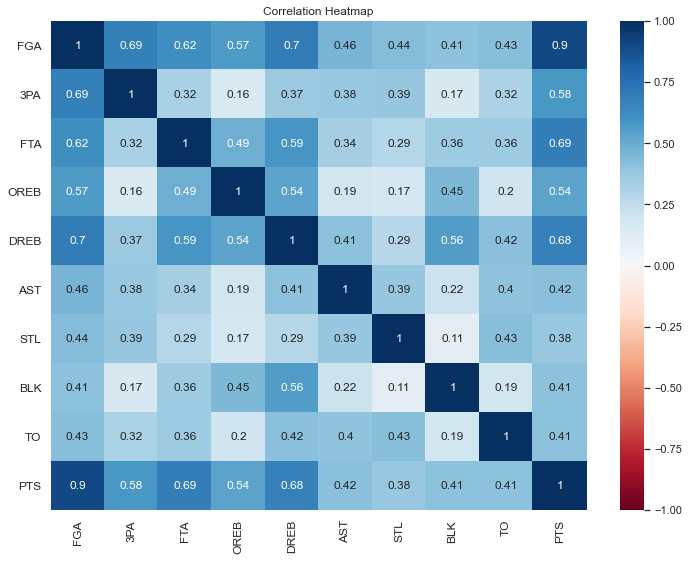

In [11]:
plt.figure(figsize=(12,9))
s=sns.heatmap(newdata.corr(),
              annot=True,
              cmap='RdBu',
              vmin=-1,
              vmax=1
             )
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Correlation Heatmap')

In [12]:
pca=PCA()

In [13]:
data_for_analysis=data.copy()

In [14]:
data_for_analysis.tail()

,Unnamed: 0,ROUND,TEAM,OPP,#,NAME,MIN,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TO,PF,PTS
1148,4,Finals 5,Saigon-Heat,Can-Tho-Catfish,12,"Nguyen-Huynh, Vinh",21,4,7,0,0,1,2,2,4,1,0,2,1,3,9
1149,5,Finals 5,Saigon-Heat,Can-Tho-Catfish,11,"Ban-Vo, Kim",15,0,4,0,4,0,0,0,1,0,0,0,0,1,0
1150,6,Finals 5,Saigon-Heat,Can-Tho-Catfish,20,"Kien, Pham-Duc",10,0,1,0,0,0,0,0,2,0,0,0,1,2,0
1151,7,Finals 5,Saigon-Heat,Can-Tho-Catfish,30,"Waale, Tim",8,1,1,0,0,0,0,2,0,1,1,0,0,5,2
1152,8,Finals 5,Saigon-Heat,Can-Tho-Catfish,52,"Huynh-Vinh, Quang",5,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [15]:
data_for_analysis=data_for_analysis.drop(['ROUND','#','MIN','FGM','3PM','FTM'],axis=1)

In [16]:
data_for_analysis.head()

,Unnamed: 0,TEAM,OPP,NAME,FGA,3PA,FTA,OREB,DREB,AST,STL,BLK,TO,PF,PTS
0,0,Danang-Dragons,Hanoi-Buffalos,"January, Anthony",31,11,3,3,17,0,1,0,3,2,33
1,1,Danang-Dragons,Hanoi-Buffalos,"Nguyen, Horace",17,10,1,0,1,6,3,0,1,2,9
2,2,Danang-Dragons,Hanoi-Buffalos,"Huy Dai, Dam",9,8,0,0,1,0,0,0,1,3,15
3,3,Danang-Dragons,Hanoi-Buffalos,"Nguyen Van, Hung",6,0,0,4,5,2,0,0,1,3,4
4,4,Danang-Dragons,Hanoi-Buffalos,"Ly, Austin",2,0,4,1,1,2,0,0,3,3,3


In [17]:
pca.fit(newdata)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

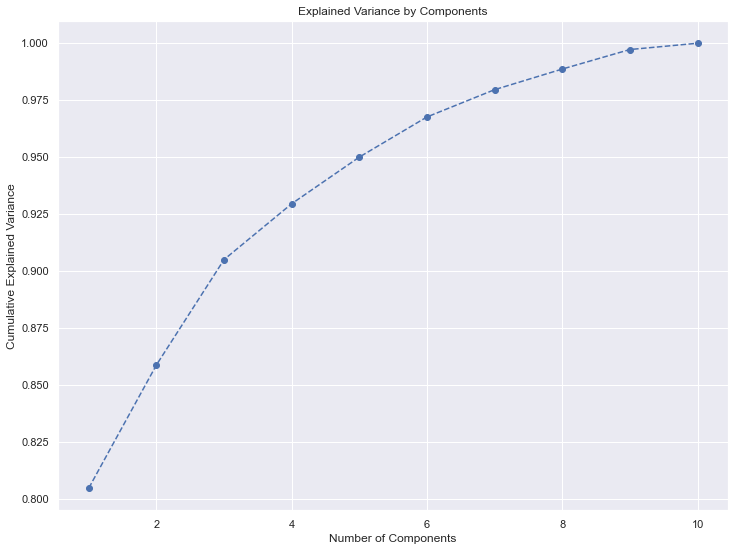

In [18]:
plt.figure(figsize = (12,9))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [19]:
pca=PCA(n_components=5)
pca.fit(newdata)

PCA(n_components=5)

In [21]:
stats_component=pd.DataFrame(data=pca.components_,
                            columns=newdata.columns.values,
                            index=['Component_1','Component_2','Component_3','Component_4','Component_5'])

In [22]:
stats_component

,FGA,3PA,FTA,OREB,DREB,AST,STL,BLK,TO,PTS
Component_1,0.565442,0.162593,0.168912,0.089853,0.265964,0.072175,0.054981,0.032757,0.076420,0.728939
Component_2,-0.203862,-0.419064,0.246903,0.177960,0.806212,0.032400,-0.047432,0.103006,0.089401,-0.135329
Component_3,0.468750,0.476052,-0.209992,-0.029737,0.322091,0.169632,0.134744,0.015052,0.151830,-0.578545
Component_4,0.372056,-0.267730,-0.398715,0.285890,0.056408,-0.359967,-0.279585,0.048515,-0.574364,-0.077553
Component_5,0.396265,-0.279622,0.633716,0.337760,-0.366089,0.014931,0.109153,-0.010039,0.058517,-0.315316


([<matplotlib.axis.YTick at 0x27162c59e20>,
 [Text(0, 0, 'Component1'),
  Text(0, 1, 'Component2'),
  Text(0, 2, 'Component3'),
  Text(0, 3, 'Component4'),
  Text(0, 4, 'Component5')])

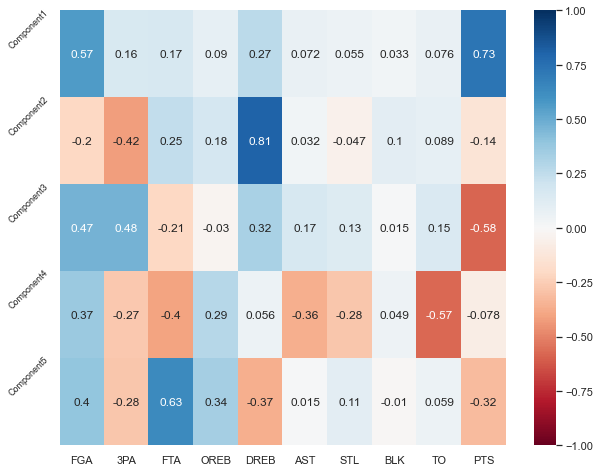

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(stats_component,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0,1,2,3,4],
          ['Component1','Component2','Component3','Component4','Component5'],
          rotation=45,
          fontsize=9)

In [25]:
scores=pca.transform(newdata)

In [27]:
a=[]
for i in range(1,11):
    kmeans_w_PCA=KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans_w_PCA.fit(scores)
    a.append(kmeans_w_PCA.inertia_)
    
    

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0, 0.5, 'Within cluster sum of square')

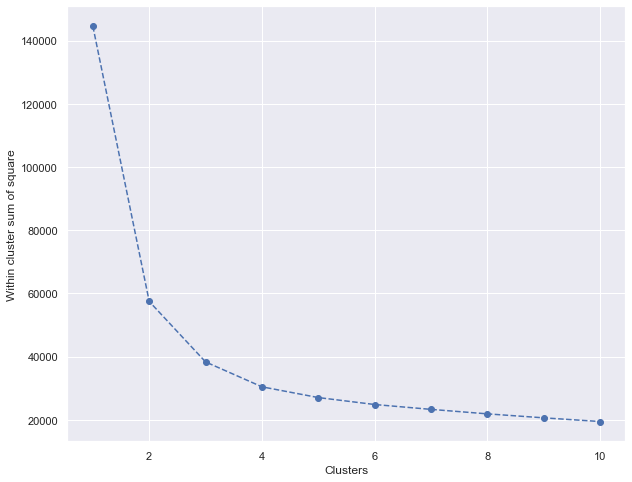

In [28]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,11),a,marker='o',linestyle='--')
plt.xlabel('Clusters')
plt.ylabel('Within cluster sum of square')

In [31]:
kmeans_w_PCA=KMeans(n_clusters=5,init='k-means++',random_state=2)

In [32]:
kmeans_w_PCA.fit(scores)

KMeans(n_clusters=5, random_state=2)

In [36]:
player_segmentation= pd.concat([data.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
player_segmentation.columns.values[-5: ] = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5']
# The last column we add contains the pca k-means clustering labels.
player_segmentation['Segment'] = kmeans_w_PCA.predict(scores)

In [37]:
player_segmentation.head()

,Unnamed: 0,ROUND,TEAM,OPP,#,NAME,MIN,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TO,PF,PTS,Component 1,Component 2,Component 3,Component 4,Component 5,Segment
0,0,Regular 1,Danang-Dragons,Hanoi-Buffalos,44,"January, Anthony",40,14,31,3,11,2,3,3,17,0,1,0,3,2,33,36.535589,0.110941,4.412889,5.156399,-4.669058,1
1,1,Regular 1,Danang-Dragons,Hanoi-Buffalos,0,"Nguyen, Horace",36,3,17,2,10,1,1,0,1,6,3,0,1,2,9,6.489637,-7.374382,7.598781,-0.456392,1.398024,3
2,2,Regular 1,Danang-Dragons,Hanoi-Buffalos,68,"Huy Dai, Dam",30,5,9,5,8,0,0,0,1,0,0,0,1,3,15,5.247643,-6.016331,-1.786629,0.034572,-4.155506,3
3,3,Regular 1,Danang-Dragons,Hanoi-Buffalos,99,"Nguyen Van, Hung",28,2,6,0,0,0,0,4,5,2,0,0,1,3,4,-4.200136,3.437874,0.871381,2.562588,0.277700,2
4,4,Regular 1,Danang-Dragons,Hanoi-Buffalos,7,"Ly, Austin",21,0,2,0,0,3,4,1,1,2,0,0,3,3,3,-7.695771,1.796339,-2.160533,-2.674975,2.110934,0
